# Basic API Usage for FFmpeg

## Input

### Creating a New Input Stream
To create a new input stream, use the `ffmpeg.input` function. This function is straightforward and initiates the stream from a specified file.


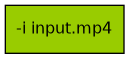

In [1]:
import ffmpeg

# Create a new input stream
ffmpeg.input("input.mp4")

### Adding Input Options
To specify additional options for the input stream, such as start time and duration, you can include them directly in the `ffmpeg.input` function.


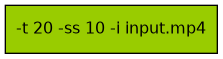

In [2]:
import ffmpeg

# Create a new input stream with specific options
ffmpeg.input("input.mp4", ss=10, t=20)  # Start at 10 seconds and last for 20 seconds


!!! note
    The `ss` option specifies the start time (in seconds), and the `t` option specifies the duration (in seconds) of the input stream. For more details, refer to the [FFmpeg documentation](https://ffmpeg.org/ffmpeg.html#Main-options).


### Stream Selection

To specify a particular Audio or Video Stream, use the stream selection feature

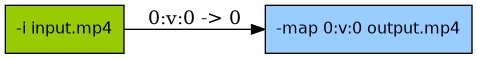

In [3]:
import ffmpeg

ffmpeg.input("input.mp4").video_stream(0).output(filename="output.mp4")

In [4]:
import ffmpeg

ffmpeg.input("input.mp4").video.output(
    filename="output.mp4"
).compile_line()  # select video stream

'ffmpeg -i input.mp4 -map 0:v output.mp4'

In [5]:
ffmpeg.input("input.mp4").audio.output(
    filename="output.mp3"
).compile_line()  # select audio stream

'ffmpeg -i input.mp4 -map 0:a output.mp3'

In [6]:
ffmpeg.input("input.mp4").subtitle.output(
    filename="output.mp3"
).compile_line()  # select subtitle stream

'ffmpeg -i input.mp4 -map 0:s output.mp3'

In [7]:
ffmpeg.input("input.mp4").video_stream(0).output(
    filename="output.mp4"
).compile_line()  # select video stream with index 0

'ffmpeg -i input.mp4 -map 0:v:0 output.mp4'

In [8]:
ffmpeg.input("input.mp4").audio_stream(0).output(
    filename="output.mp3"
).compile_line()  # select audio stream with index 0

'ffmpeg -i input.mp4 -map 0:a:0 output.mp3'

In [9]:
ffmpeg.input("input.mp4").subtitle_stream(0).output(
    filename="output.mp3"
).compile_line()  # select subtitle stream with index 0

'ffmpeg -i input.mp4 -map 0:s:0 output.mp3'



## Output

### Creating a New Output Stream
To create a new output stream, use the `ffmpeg.output` function. This function is used to configure the output settings of the stream.



!!! note
    The `ss` option specifies the start time (in seconds), and the `t` option specifies the duration (in seconds) of the input stream. For more details, refer to the [FFmpeg documentation](https://ffmpeg.org/ffmpeg.html#Main-options).

## Output

### Creating a New Output Stream
To create a new output stream, use the `ffmpeg.output` function. This function is used to configure the output settings of the stream.


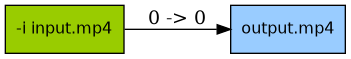

In [10]:
import ffmpeg

# Create a new output stream
ffmpeg.input("input.mp4").output(filename="output.mp4")


### Specifying Output Options
You can specify various output options directly in the `ffmpeg.output` function, such as the start time and duration for the output file.

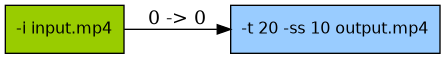

In [11]:
import ffmpeg

# Create and configure a new output stream
ffmpeg.input("input.mp4").output(
    filename="output.mp4", ss=10, t=20
)  # Output starting at 10 seconds with a duration of 20 seconds

You can also map multiple streams to a single output file.


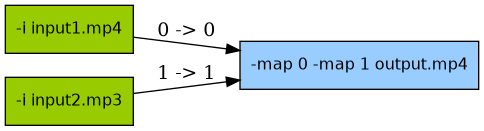

In [12]:
import ffmpeg

# Define input streams
input1 = ffmpeg.input("input1.mp4")
input2 = ffmpeg.input("input2.mp3")

# Map multiple inputs to a single output
ffmpeg.output(input1, input2, filename="output.mp4")

Alternatively:


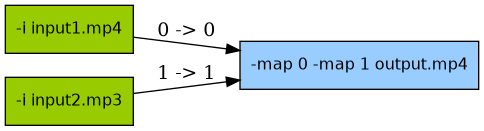

In [13]:
import ffmpeg

# Chain input and output operations
(ffmpeg.input("input1.mp4").output(ffmpeg.input("input2.mp3"), filename="output.mp4"))


## Merging Outputs

FFmpeg allows processing multiple output files simultaneously. The Python FFmpeg wrapper supports this feature through the `merge_outputs` method.


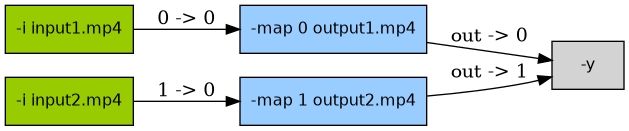

In [14]:
import ffmpeg

# Define input streams
input1 = ffmpeg.input("input1.mp4")
input2 = ffmpeg.input("input2.mp4")

# Define output streams
output1 = input1.output(filename="output1.mp4")
output2 = input2.output(filename="output2.mp4")

# Merge the outputs into a single operation
ffmpeg.merge_outputs(output1, output2).global_args(y=True)

## Codecs Support

typed-ffmpeg supports codec options for input and output nodes. It provides typehint, docstrings and autocomplete for ffmpeg codecs


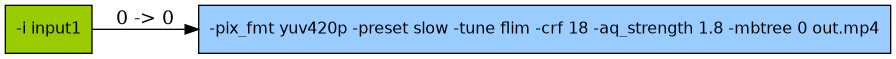

In [2]:
import ffmpeg

input1 = ffmpeg.input("input1")
input1.output(
    filename="out.mp4",
    encoder_options=ffmpeg.codecs.encoders.libx264(
        crf=18, preset="slow", tune="flim", aq_strength=1.8, mbtree=0
    ),
    pix_fmt="yuv420p",
)